<a href="https://colab.research.google.com/github/nordavinden/CycleGAN-Tensorflow-2/blob/master/cgan_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-image 
!pip install oyaml
!pip install tensorflow-addons==0.10.0
!git clone https://github.com/nordavinden/CycleGAN-Tensorflow-2

%load_ext autoreload
%autoreload 2

from PIL import Image  
import PIL 
import PIL.ImageOps
import numpy as np
import matplotlib.pyplot as plt

%cd ./CycleGAN-Tensorflow-2/

     |████████████████████████████████| 1.1MB 10.5MB/s 
Cloning into 'CycleGAN-Tensorflow-2'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 210 (delta 6), reused 5 (delta 2), pack-reused 194
Receiving objects: 100% (210/210), 7.96 MiB | 6.81 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/CycleGAN-Tensorflow-2


(50, 4, 2)
(2, 50, 224, 224, 4)


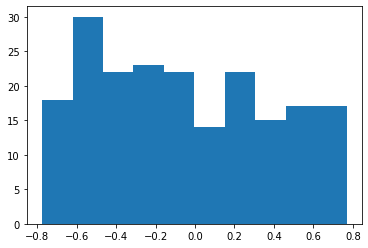

In [2]:
data = np.load('stick-224p-50f.npz')
print(data['phis'].shape)
print(data['side_imgs'].shape)
plt.hist(data['phis'][:,:,1].flatten())

In [7]:
!rm -r ./datasets/cycleman
!mkdir {./datasets,./datasets/cycleman,./datasets/cycleman/trainA,./datasets/cycleman/trainB,./datasets/cycleman/testA,./datasets/cycleman/testB}

def dump_imgs(imgs, mode):
    for i in range(imgs.shape[1]):
       im = Image.fromarray(np.uint8(imgs[0, i,:,:,:]), mode = "RGBA")
       im = PIL.ImageOps.invert(im.convert('RGB'))
       im.save("./datasets/cycleman/" + mode + "A/" + str(i) + ".jpg")
       im = Image.fromarray(np.uint8(imgs[1, i,:,:,:]), mode = "RGBA")
       im = PIL.ImageOps.invert(im.convert('RGB'))
       im.save("./datasets/cycleman/" + mode + "B/" + str(i) + ".jpg") 

dump_imgs(data['side_imgs'][:,:,:,:,:], "train")
dump_imgs(data['side_imgs'][:,:,40:,:,:], "test")

mkdir: cannot create directory ‘./datasets’: File exists


In [12]:
!nvidia-smi -L
!time python train.py --dataset cycleman --load_size 124 --crop_size 124 --epochs 10 --epoch_decay 9 

GPU 0: Tesla K80 (UUID: GPU-839af806-cdf2-1b1d-8977-8141494a49e9)
2021-03-23 15:13:42.538102: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.3.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
2021-03-23 15:13:44.154670: I tensorflow/compiler/jit/xla_cpu_device.cc: